# I'm just gonna see if I can write a quick and dirty kepler-planet function thing

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
filename = 'planets_2019.07.30_19.22.04.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
planets = pd.read_csv(filename, 
                     sep=",", comment="#")

In [4]:
# orig function:
def read_kepler_data(fileLocation):
    names = ('RowID', 'SysName', 'planetLetter', 'NumberOfPlanets', 'Porb', 
             'ePorbU', 'ePorbL',       'a',             'ea',       'ecc', 
             'eeccU',    'eeccL',    'Incl',           'eInclU',    'eInclL', 
             'pMass',   'epMassU', 'epMassL',          'pMassType', 'sMass', 
             'esMass',  'sRadius', 'esRadiusU',       'esRadiusL',  'tTime', 
             'etTimeU', 'etTimeL')
    formats = ('f4',       'S12',     'S2',               'f4',        'f4',
               'f4',       'f4',      'f4',               'f4',        'f4',
               'f4',       'f4',      'f4',               'f4',        'f4',
               'f4',       'f4',      'f4',               'S8',        'f4',
               'f4',       'f4',      'f4',               'f4',        'f4', 
               'f4',       'f4')
    kepler_data = np.genfromtxt(fileLocation, 
                                comments='#', 
                                delimiter=',', 
                                dtype={'names':names, 
                                       'formats':formats})
    return kepler_data


In [5]:
planets['pl_hostname'].unique()

array(['11 Com', '11 UMi', '14 And', ..., 'tau Gem', 'ups And', 'xi Aql'],
      dtype=object)

In [6]:
# convert based on name:
name = 'ups And'

# only select entries with this name
mask = planets['pl_hostname'] == name
ecc = planets['pl_orbeccen'][mask]
a = planets['pl_orbsmax'][mask]
Porb = planets['pl_orbper'][mask]
Incl = planets['pl_orbincl'][mask]
sMass = planets['st_mass'][mask]
pMass = planets['pl_bmassj'][mask]

#tmax=np.array(tTime).max()
#tTime = []
#for t in planets['pl_orbtper'][mask]:
#    tTime.append([tmax,t])
tTime = planets['pl_orbtper'][mask]
    
tTime
Porb

#ecc,a

4021       4.617033
4022     241.258000
4023    1276.460000
Name: pl_orbper, dtype: float64

In [7]:
tTime

4021    2450005.368
4022    2450157.780
4023    2451347.480
Name: pl_orbtper, dtype: float64

In [8]:
planets.keys()

Index(['pl_hostname', 'pl_letter', 'pl_name', 'pl_pnum', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl',
       'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj',
       'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens',
       'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'pl_ttvflag', 'pl_kepflag',
       'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist',
       'st_disterr1', 'st_disterr2', 'st_distlim', 'gaia_dist',
       'gaia_disterr1', 'gaia_disterr2', 'gaia_distlim', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'rowupdate', 'pl_orbtper', '

In [9]:
#planets['pl_orbtper']

In [10]:
# dict?
kepler_data = {}

#kepler_data['RowID'] = -1
kepler_data['SysName'] = name
#kepler_data['planetLetter'] = 'X'
kepler_data['NumberOfPlanets'] = len(a) 
kepler_data['Porb'] = Porb.values
#kepler_data['ePorbU']=0
#kepler_data['ePorbL']=0
kepler_data['a']=a.values
#kepler_data['ea']=0
kepler_data['ecc']=ecc.values
#kepler_data['eeccU']=0
#kepler_data['eeccL']=0
kepler_data['Incl']=Incl.values
#kepler_data['eInclU']=0  
kepler_data['pMass']=pMass.values
kepler_data['sMass']=sMass.values
kepler_data['tTime']=tTime.values
#'eInclL', 
#             'pMass',   'epMassU', 'epMassL',          'pMassType', 'sMass', 
#             'esMass',  'sRadius', 'esRadiusU',       'esRadiusL',  'tTime', 
#             'etTimeU', 'etTimeL'

In [11]:
kepler_data

{'SysName': 'ups And',
 'NumberOfPlanets': 3,
 'Porb': array([   4.617033,  241.258   , 1276.46    ]),
 'a': array([0.059222, 0.827774, 2.51329 ]),
 'ecc': array([0.0215, 0.2596, 0.2987]),
 'Incl': array([nan, nan, nan]),
 'pMass': array([0.6876, 1.981 , 4.132 ]),
 'sMass': array([1.3, 1.3, 1.3]),
 'tTime': array([2450005.368, 2450157.78 , 2451347.48 ])}

In [12]:
from convert_kepler_data import convert_kepler_data

In [13]:
star_mass, planet_masses, planet_initial_position, planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

In [14]:
star_mass

1.3

In [15]:
planet_masses

array([0.6876, 1.981 , 4.132 ])

In [16]:
planet_initial_position

array([[-0.05794873,  0.        ,  0.        ],
       [-0.41464231, -0.45132958,  0.        ],
       [ 1.67133248,  0.55973363,  0.        ]])

In [17]:
planet_initial_velocity

array([[   0.        , -138.43721646,    0.        ],
       [  23.71957473,  -21.79147972,    0.        ],
       [  -5.71320164,   17.05929214,    0.        ]])

In [18]:
from kepler_data_table_to_new_planet_system import read_convert_new_system

In [19]:
filename = 'planets_2019.07.30_19.22.04.csv'

What are the possible names?

In [20]:
planets['pl_hostname'].unique()

array(['11 Com', '11 UMi', '14 And', ..., 'tau Gem', 'ups And', 'xi Aql'],
      dtype=object)

We want one with a few planets.  We can play with the table under the exoplanet arxiv: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets

Or lets try looking at some to see what they have in their entries:

In [21]:
name = '11 Com' # try first one

mask = planets['pl_hostname'] == name
# how many planets? lets see how long the eccentricity list is:
planets['pl_orbeccen'][mask]

0    0.231
Name: pl_orbeccen, dtype: float64

Well this one only has 1 planet, so let's try another name:

In [22]:
name = 'ups And' # try first one

mask = planets['pl_hostname'] == name
# how many planets? lets see how long the eccentricity list is:
planets['pl_orbeccen'][mask]

4021    0.0215
4022    0.2596
4023    0.2987
Name: pl_orbeccen, dtype: float64

Ok, this one has a few planets, so let's check it out.

In [23]:
new_kepler_data = read_convert_new_system(filename, 'ups And')
new_kepler_data

{'SysName': 'ups And',
 'NumberOfPlanets': 3,
 'Porb': array([   4.617033,  241.258   , 1276.46    ]),
 'a': array([0.059222, 0.827774, 2.51329 ]),
 'ecc': array([0.0215, 0.2596, 0.2987]),
 'Incl': array([0., 0., 0.]),
 'pMass': array([0.6876, 1.981 , 4.132 ]),
 'sMass': array([1.3, 1.3, 1.3]),
 'tTime': array([2450005.368, 2450157.78 , 2451347.48 ])}

We can convert this now just like we did before:

In [27]:
from convert_kepler_data import convert_kepler_data
star_mass, planet_mass, planet_initial_position, planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

Then we can use these again as inputs into our hermite solver.

In [28]:
from hermite_library import do_hermite

In [34]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=1e4*5000,
                               Nsteps=5000, threeDee=True)

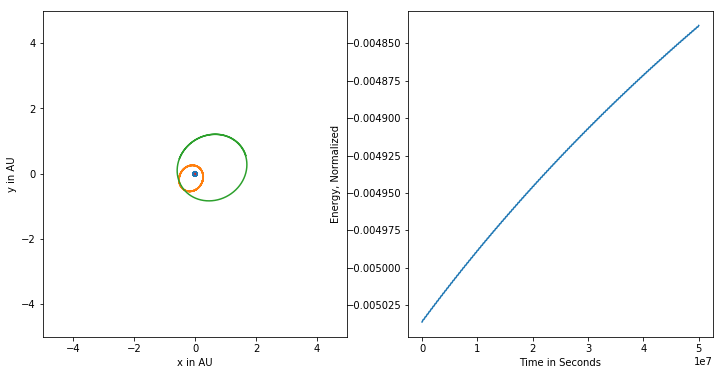

In [35]:

# we are doing 1 row of plots with 2 columns of plots
# and making sure that our plot is 2X as wide as long
fig, ax = plt.subplots(1,2, figsize=(6*2, 6))

for i in range(r_h.shape[0]): # loop over number of planets+star
    ax[0].plot(r_h[i, 0, :], r_h[i, 1, :])

# making extra fancy with labels
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
# also set a different-than-default size
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)

# now I'll make energy as a function of time
ax[1].plot(t_h, E_h)
ax[1].set_xlabel('Time in Seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()